# 1 Initialisation

## 1.1 Imports

In [1]:
# Librairies pour le traitement des données
import pandas as pd
import numpy as np

# Librairies pour la visualisation de graphiques
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #Définir le style par défaut pour les graphiques


# Librairies pour la visualisation de cartes
import folium # Pour la première fois installer avec 'pip install folium' ou 'conda install folium -c conda-forge'. Voir : https://python-visualization.github.io/folium/quickstart.html
import branca.colormap as cm
from branca.element import Template, MacroElement


## 1.2 Définition de fonctions utilitaires

In [2]:
def verifier_taille(data):
    """ Fonction de vérification de la taille d'un data set """
    taille = data.shape
    print('Le data set contient :')
    print('\t-', taille[0], 'lignes et', taille[1], 'colonnes.')
    nb_null = data.isnull().sum().sum()
    print('\t-', nb_null, 'valeurs manquantes, ce qui représente', round(100*nb_null/(taille[0]*taille[1]),2), '% du data set.')

def afficher_echantillon(data, n):
    """ Afficher un sous-échantillon aléatoire """
    print('Voici un sous-échantillon aléatoire :')
    return data.sample(n, random_state=np.random.seed())

def valeurs_manquantes(data):
    """ Retourner les valeurs manquantes d'un data frame/set """
    return data[data.isnull().any(axis=1)]

## 1.3 Récupération du Data Set

In [3]:
# Ouverture du fichier CSV
df = pd.read_csv('EdStatsData.csv', sep=',')

verifier_taille(df)

afficher_echantillon(df, 5)

Le data set contient :
	- 886930 lignes et 69 colonnes.
	- 52568249 valeurs manquantes, ce qui représente 85.9 % du data set.
Voici un sous-échantillon aléatoire :


Country Name Country Code  \
551149                 Montenegro          MNE   
729216                South Sudan          SSD   
647838                   Portugal          PRT   
428943  Latin America & Caribbean          LCN   
685445                     Serbia          SRB   

                                           Indicator Name  \
551149  LLECE: 3rd grade students by reading proficien...   
729216  Wittgenstein Projection: Percentage of the pop...   
647838  SABER: (Teachers) Policy Goal 1: Setting clear...   
428943  Annual statutory teacher salaries in public in...   
685445  Africa Dataset: Percentage of primary pupils i...   

             Indicator Code  1970  1971  1972  1973  1974  1975  ...  2055  \
551149      LO.LLECE.REA3.3   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
729216    PRJ.ATT.60UP.3.FE   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
647838     SABER.TECH.GOAL1   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
428943      OECD.TSAL.0.E15   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
685445  UIS.AFR.ECP.MG.1.PU   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

        2060  2065  2070  2075  2080  2085  2090  2095  2100  
551149   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
729216   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
647838   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
428943   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
685445   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 69 columns]

<em># On peut constater que le data set contient une très grande quantité de valeurs manquantes. Il faudra donc fliter le data set plusieurs fois et le transformer afin de l'exploiter</em>

## 1.4 Récupération des meta data

<em># Les meta data nous donnent des informations supplémentaires utiles à l'étude</em>

### 1.4.1 Récupération du groupe économique & de la région géographique de chaque pays

In [4]:
# Ouverture du fichier meta data (md)
md = pd.read_csv('EdStatsCountry.csv', sep=',')

# Garder uniquement les colonnes pertinentes 
md = md[['Country Code','Short Name','Special Notes','Region','Income Group']]

afficher_echantillon(md, 5)

Voici un sous-échantillon aléatoire :


Country Code Short Name  \
169          OMN       Oman   
8            ARM    Armenia   
19           BGR   Bulgaria   
27           BRA     Brazil   
139          MDV   Maldives   

                                         Special Notes  \
169                                                NaN   
8                                                  NaN   
19   April 2011 database update: The National Stati...   
27                                                 NaN   
139  April 2012 database update: The Department of ...   

                         Region          Income Group  
169  Middle East & North Africa  High income: nonOECD  
8         Europe & Central Asia   Lower middle income  
19        Europe & Central Asia   Upper middle income  
27    Latin America & Caribbean   Upper middle income  
139                  South Asia   Upper middle income

### 1.4.2 Récupération des agrégats de pays

<em># Certains individus du data set ne sont pas des pays singuliers, mais des agrégats (groupes) de pays qui doivent donc être filtrés et/ou stockés dans un data frame dédiés pour des futurs traitements</em>

In [5]:
# Récupérer et afficher les agrégats de pays et éventuellement les pays sans mete data
agreg_md = md[((md['Region'].isnull()) | (md['Income Group'].isnull())) & (md['Special Notes'].notna())]
agreg_md

Country Code                                      Short Name  \
5            ARB                                      Arab World   
57           EAP           East Asia & Pacific (developing only)   
58           EAS         East Asia & Pacific (all income levels)   
59           ECA         Europe & Central Asia (developing only)   
60           ECS       Europe & Central Asia (all income levels)   
63           EMU                                       Euro area   
68           EUU                                  European Union   
89           HIC                                     High income   
92           HPC          Heavily indebted poor countries (HIPC)   
116          LAC     Latin America & Caribbean (developing only)   
122          LCN   Latin America & Caribbean (all income levels)   
123          LDC    Least developed countries: UN classification   
124          LIC                                      Low income   
127          LMC                             Lower middle income   
128          LMY                             Low & middle income   
140          MEA  Middle East & North Africa (all income levels)   
143          MIC                                   Middle income   
148          MNA    Middle East & North Africa (developing only)   
157          NAC                                   North America   
168          OED                                    OECD members   
187          SAS                                      South Asia   
198          SSA            Sub-Saharan Africa (developing only)   
200          SSF          Sub-Saharan Africa (all income levels)   
225          UMC                             Upper middle income   
234          WLD                                           World   

                                         Special Notes Region Income Group  
5    Arab World aggregate. Arab World is composed o...    NaN          NaN  
57   East Asia and Pacific regional aggregate (does...    NaN          NaN  
58   East Asia and Pacific regional aggregate (incl...    NaN          NaN  
59   Europe and Central Asia regional aggregate (do...    NaN          NaN  
60   Europe and Central Asia regional aggregate (in...    NaN          NaN  
63                                Euro area aggregate.    NaN          NaN  
68                           European Union aggregate.    NaN          NaN  
89   High income group aggregate. High-income econo...    NaN          NaN  
92          Heavily indebted poor countries aggregate.    NaN          NaN  
116  Latin America and Caribbean regional aggregate...    NaN          NaN  
122  Latin America and Caribbean regional aggregate...    NaN          NaN  
123  Least developed countries (UN classification) ...    NaN          NaN  
124  Low income group aggregate. Low-income economi...    NaN          NaN  
127  Lower middle income group aggregate. Lower-mid...    NaN          NaN  
128  Low and middle income group aggregate (all dev...    NaN          NaN  
140  Middle East and North Africa regional aggregat...    NaN          NaN  
143  Middle income group aggregate. Middle-income e...    NaN          NaN  
148  Middle East and North Africa regional aggregat...    NaN          NaN  
157  North America regional aggregate. There are no...    NaN          NaN  
168  OECD members aggregate (all, including develop...    NaN          NaN  
187  South Asia regional aggregate. There are no ec...    NaN          NaN  
198  Sub-Saharan Africa regional aggregate (does no...    NaN          NaN  
200  Sub-Saharan Africa regional aggregate (includi...    NaN          NaN  
225  Upper middle income group aggregate. Upper-mid...    NaN          NaN  
234                                   World aggregate.    NaN          NaN

### 1.4.3 Filtrage des meta data des pays

In [6]:
# Retirer les agrégats des meta data (md) et garder que les colonnes néccesaire
md = md.drop(agreg_md.index)[['Country Code','Short Name','Region','Income Group']]

# Réindexer les lignes
md.reset_index(drop=True, inplace=True)

# Vérification des valeurs manquantes
verifier_taille(md)

md

Le data set contient :
	- 216 lignes et 4 colonnes.
	- 4 valeurs manquantes, ce qui représente 0.46 % du data set.


Country Code    Short Name                      Region  \
0            ABW         Aruba   Latin America & Caribbean   
1            AFG   Afghanistan                  South Asia   
2            AGO        Angola          Sub-Saharan Africa   
3            ALB       Albania       Europe & Central Asia   
4            AND       Andorra       Europe & Central Asia   
..           ...           ...                         ...   
211          XKX        Kosovo       Europe & Central Asia   
212          YEM         Yemen  Middle East & North Africa   
213          ZAF  South Africa          Sub-Saharan Africa   
214          ZMB        Zambia          Sub-Saharan Africa   
215          ZWE      Zimbabwe          Sub-Saharan Africa   

             Income Group  
0    High income: nonOECD  
1              Low income  
2     Upper middle income  
3     Upper middle income  
4    High income: nonOECD  
..                    ...  
211   Lower middle income  
212   Lower middle income  
213   Upper middle income  
214   Lower middle income  
215            Low income  

[216 rows x 4 columns]

# 2 Netoyage du Data Set

## 2.1 Filtrage des individus (lignes)

### 2.1.1 Filter les indicateurs

<em> # On commence par éliminer tous les indicateurs inutile à notre étude. On garde uniquement les indicateurs relatifs à : 
    <ul>
        <li>la population (total et croissance)</li>
        <li>Le niveau d'éducation (études) avec les nombres de personnes étudiantes ou dîplomées niveau lycée et plus </li>
        <li>Le niveau téchnologique de la population (internet et ordinateurs)</li>
    </ul>
</em>

In [7]:
# Liste des indicateurs pertinents pour l'étude
indicators = ['Enrolment in upper secondary education, both sexes (number)', 'Enrolment in post-secondary non-tertiary education, both sexes (number)', 'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total', 'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total', 'Population, total', 'Population growth (annual %)', 'Internet users (per 100 people)', 'Personal computers (per 100 people)']

# Garder uniquement ces indicateurs
df = df[df['Indicator Name'].isin(indicators)]
# Réindexer les lignes
df.reset_index(drop=True, inplace=True)

verifier_taille(df)

afficher_echantillon(df, 5)

Le data set contient :
	- 1936 lignes et 69 colonnes.
	- 84409 valeurs manquantes, ce qui représente 63.19 % du data set.
Voici un sous-échantillon aléatoire :


Country Name Country Code  \
137      Barbados          BRB   
132    Bangladesh          BGD   
14        Albania          ALB   
899   Korea, Rep.          KOR   
1621    St. Lucia          LCA   

                                         Indicator Name    Indicator Code  \
137   Enrolment in upper secondary education, both s...           UIS.E.3   
132                        Population growth (annual %)       SP.POP.GROW   
14    Wittgenstein Projection: Percentage of the tot...  PRJ.ATT.ALL.4.MF   
899                 Personal computers (per 100 people)    IT.CMP.PCMP.P2   
1621                                  Population, total       SP.POP.TOTL   

               1970           1971           1972           1973  \
137             NaN            NaN            NaN            NaN   
132        2.538375       2.094771       1.750092       1.605032   
14              NaN            NaN            NaN            NaN   
899             NaN            NaN            NaN            NaN   
1621  104160.000000  105390.000000  106455.000000  107466.000000   

               1974           1975  ...  2055  2060  2065  2070  2075  2080  \
137             NaN            NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
132        1.722186       2.013666  ...   NaN   NaN   NaN   NaN   NaN   NaN   
14              NaN            NaN  ...  0.12  0.12  0.13  0.14  0.15  0.16   
899             NaN            NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1621  108532.000000  109769.000000  ...   NaN   NaN   NaN   NaN   NaN   NaN   

      2085  2090  2095  2100  
137    NaN   NaN   NaN   NaN  
132    NaN   NaN   NaN   NaN  
14    0.17  0.18   0.2  0.21  
899    NaN   NaN   NaN   NaN  
1621   NaN   NaN   NaN   NaN  

[5 rows x 69 columns]

<em># Après ce premier filtrage, le nombre de valeurs manquantes a significativement diminué, mais ce nombre reste encore trop important. On continue donc le processus de nettoyage</em>

### 2.1.2 Filter les pays agrégats et les sauvgarder pour des futurs imputations

In [8]:
# Retirer les agrégats du data set (df) et les placer dans un nouveau(agreg_countries_df)
agreg_countries = agreg_md['Country Code'].values
agreg_countries_df = df[df['Country Code'].isin(agreg_countries)].sort_values('Country Code')
df = df[~df['Country Code'].isin(agreg_countries)]

# Réindexer les lignes
df.reset_index(drop=True, inplace=True)

verifier_taille(df)

Le data set contient :
	- 1736 lignes et 69 colonnes.
	- 75727 valeurs manquantes, ce qui représente 63.22 % du data set.


## 2.2 Agrégation des séries temporelles en une seule valeur (pour chaque indicateur de chaque pays)

<em> # La deuxième étape du nettoyage du data set consiste à réduire les séries temporelles en une seule valeur (la première valeur non null)
</em>

### 2.2.0 Fonction utilitaire

In [9]:
def agreger_temps(data, annees, annee_ref):
    """ Fonction Agrégation des séries temporelles en deux :
        - La valeur actuelle en gardant soit : 
            * la dernière valeur non null avant l'année de réfèrence 
            * la première valeur non null après l'année de réfèrence
        - L'année retenue        
    """
    new_df = pd.concat([data[['Country Code', 'Indicator Name']], pd.DataFrame({'Val': data.index, 'Year': data.index}, index=data.index)], axis=1)
    data = data[annees]
    
    # Recherche de la première année (avant ou après) l'année de réfèrence avec une valeur non null
    new_df['Year'] = data.apply(lambda x: x*0+[int(annee)*(np.sign(int(annee_ref)-int(annee)) if annee!=annee_ref else 1) for annee in data.columns.values], axis=1, result_type='broadcast').max(axis=1)    
    new_df = new_df[new_df['Year'].notna()]
    new_df['Year'] = new_df['Year'].map(lambda y: str(np.abs(int(y))))
    
    # Récupérer la valeur depuis le data set selon les années trouvées
    new_df = new_df.apply(lambda x: [x[0], x[1],data.loc[x[2], x[3]], int(x[3])], axis=1, result_type='broadcast')
    
    return new_df.sort_values('Country Code')

### 2.2.1 Agrégation temporelle du data set

In [10]:
# Récupérer la liste des années
annees = df.columns[4:].values

# Agrégation des valeurs sur toutes les années
agreg_temp_df = agreger_temps(df, annees, '2020')
agreg_temp_df

Country Code                                     Indicator Name  \
77            ABW                                  Population, total   
72            ABW  Enrolment in post-secondary non-tertiary educa...   
73            ABW  Enrolment in upper secondary education, both s...   
74            ABW                    Internet users (per 100 people)   
75            ABW                Personal computers (per 100 people)   
...           ...                                                ...   
1730          ZWE                    Internet users (per 100 people)   
1731          ZWE                Personal computers (per 100 people)   
1732          ZWE                       Population growth (annual %)   
1733          ZWE                                  Population, total   
1735          ZWE  Wittgenstein Projection: Percentage of the tot...   

             Val  Year  
77      104822.0  2016  
72         124.0  2000  
73        4841.0  2012  
74     93.542454  2016  
75      9.917683  2006  
...          ...   ...  
1730   23.119989  2016  
1731     7.43114  2008  
1732     2.33607  2016  
1733  16150362.0  2016  
1735        0.32  2020  

[1509 rows x 4 columns]

### 2.2.2 Création d'un data set prospectif

In [11]:
# Agrégation des valeurs sur les années futurs, pour construire un data set prospective
annees_futurs = [annee for annee in annees if annee>'2020']

propect_df = agreger_temps(df, annees_futurs, '2020')
propect_df

Country Code                                     Indicator Name   Val  \
79            ABW  Wittgenstein Projection: Percentage of the tot...  0.12   
78            ABW  Wittgenstein Projection: Percentage of the tot...  0.23   
14            ALB  Wittgenstein Projection: Percentage of the tot...  0.08   
15            ALB  Wittgenstein Projection: Percentage of the tot...  0.39   
1638          ARE  Wittgenstein Projection: Percentage of the tot...  0.16   
...           ...                                                ...   ...   
1415          ZAF  Wittgenstein Projection: Percentage of the tot...  0.28   
1726          ZMB  Wittgenstein Projection: Percentage of the tot...  0.03   
1727          ZMB  Wittgenstein Projection: Percentage of the tot...  0.09   
1734          ZWE  Wittgenstein Projection: Percentage of the tot...  0.04   
1735          ZWE  Wittgenstein Projection: Percentage of the tot...  0.37   

      Year  
79    2025  
78    2025  
14    2025  
15    2025  
1638  2025  
...    ...  
1415  2025  
1726  2025  
1727  2025  
1734  2025  
1735  2025  

[332 rows x 4 columns]

In [12]:
# Comparaison de la taille du data set prospective avec le data set original
taille_df = len(df)
taille_propect_df = len(propect_df)

print(round(taille_propect_df/taille_df, 2), '% du data set contient des données prospectives.')

0.19 % du data set contient des données prospectives.


<em> # Le data set contient quasiement pas de données prospectives, on ne les retient donc pas pour la suite de l'étude !</em>

## 2.3 Transformation du data set : les indicateurs deviennent des colonnes avec les agrégations temporelles

### 2.3.1 Etablir la nouvelle structure du data set

In [13]:
countries = df['Country Code'].sort_values().unique()
new_df = pd.concat([pd.DataFrame({'Country Code':countries}), pd.DataFrame(np.full([len(countries), len(indicators)], np.nan), columns=indicators)], axis=1)
new_df

Country Code  Enrolment in upper secondary education, both sexes (number)  \
0            ABW                                                NaN             
1            AFG                                                NaN             
2            AGO                                                NaN             
3            ALB                                                NaN             
4            AND                                                NaN             
..           ...                                                ...             
212          XKX                                                NaN             
213          YEM                                                NaN             
214          ZAF                                                NaN             
215          ZMB                                                NaN             
216          ZWE                                                NaN             

     Enrolment in post-secondary non-tertiary education, both sexes (number)  \
0                                                  NaN                         
1                                                  NaN                         
2                                                  NaN                         
3                                                  NaN                         
4                                                  NaN                         
..                                                 ...                         
212                                                NaN                         
213                                                NaN                         
214                                                NaN                         
215                                                NaN                         
216                                                NaN                         

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total  \
0                                                  NaN                                                                                
1                                                  NaN                                                                                
2                                                  NaN                                                                                
3                                                  NaN                                                                                
4                                                  NaN                                                                                
..                                                 ...                                                                                
212                                                NaN                                                                                
213                                                NaN                                                                                
214                                                NaN                                                                                
215                                                NaN                                                                                
216                                                NaN                                                                                

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total  \
0                                                  NaN                                                                               
1                                                  NaN                                                                               
2                                              

### 2.3.2 Remplir le data set avec les agrégations temporelles

In [14]:
years = agreg_temp_df.groupby('Country Code')['Year'].mean()
agreg_temp_countries = agreg_temp_df['Country Code'].unique()

for country in new_df['Country Code']:    
    new_df.loc[new_df['Country Code']==country, 'Year'] = int(years.loc[country]) if country in agreg_temp_countries else np.nan
    for indicator in indicators:
        val = agreg_temp_df[(agreg_temp_df['Country Code']==country) & (agreg_temp_df['Indicator Name']==indicator)]['Val'].values
        val = val[0] if len(val)>0 else np.nan
        new_df.loc[new_df['Country Code']==country, indicator] = val   

new_df 

Country Code  Enrolment in upper secondary education, both sexes (number)  \
0            ABW                                             4841.0             
1            AFG                                           968769.0             
2            AGO                                           303568.0             
3            ALB                                           151937.0             
4            AND                                             1288.0             
..           ...                                                ...             
212          XKX                                                NaN             
213          YEM                                           701984.0             
214          ZAF                                          2971802.0             
215          ZMB                                                NaN             
216          ZWE                                           490522.0             

     Enrolment in post-secondary non-tertiary education, both sexes (number)  \
0                                                124.0                         
1                                             145220.0                         
2                                                  NaN                         
3                                               1952.0                         
4                                                182.0                         
..                                                 ...                         
212                                                NaN                         
213                                            27381.0                         
214                                           273377.0                         
215                                                NaN                         
216                                              910.0                         

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total  \
0                                                 0.11                                                                                
1                                                  NaN                                                                                
2                                                  NaN                                                                                
3                                                 0.35                                                                                
4                                                  NaN                                                                                
..                                                 ...                                                                                
212                                                NaN                                                                                
213                                                NaN                                                                                
214                                               0.25                                                                                
215                                               0.07                                                                                
216                                               0.32                                                                                

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total  \
0                                                 0.20                                                                               
1                                                  NaN                                                                               
2                                              

### 2.3.3 Ajout des meta data : groupe éconimque et région

In [15]:
# Fusion du data set avec les meta data
df = md.merge(new_df, how='right')

verifier_taille(df)

afficher_echantillon(df, 5)

Le data set contient :
	- 217 lignes et 13 colonnes.
	- 235 valeurs manquantes, ce qui représente 8.33 % du data set.
Voici un sous-échantillon aléatoire :


Country Code         Short Name                     Region  \
215          ZMB             Zambia         Sub-Saharan Africa   
52           DMA           Dominica  Latin America & Caribbean   
13           BDI            Burundi         Sub-Saharan Africa   
132          MNG           Mongolia        East Asia & Pacific   
75           GNQ  Equatorial Guinea         Sub-Saharan Africa   

             Income Group  \
215   Lower middle income   
52    Upper middle income   
13             Low income   
132   Lower middle income   
75   High income: nonOECD   

     Enrolment in upper secondary education, both sexes (number)  \
215                                                NaN             
52                                              2031.0             
13                                            133288.0             
132                                           120964.0             
75                                              3909.0             

     Enrolment in post-secondary non-tertiary education, both sexes (number)  \
215                                                NaN                         
52                                              1066.0                         
13                                                 NaN                         
132                                             6948.0                         
75                                                 NaN                         

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total  \
215                                               0.07                                                                                
52                                                 NaN                                                                                
13                                                0.02                                                                                
132                                               0.39                                                                                
75                                                0.15                                                                                

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total  \
215                                               0.03                                                                               
52                                                 NaN                                                                               
13                                                0.01                                                                               
132                                               0.08                                                                               
75                                                0.04                                                                               

     Population, total  Population growth (annual %)  \
215         16591390.0                      3.002816   
52             73543.0                      0.519411   
13          10524117.0                      3.135333   
132          3027398.0                      1.682874   
75           1221490.0                      3.847227   

     Internet users (per 100 people)  Personal computers (per 100 people)  \
215                        25.506579                             1.142108   
52                         67.030000                            18.485603   
13                          5.173627                             0.808198   
132                        22.265770                            26.195419   
75                         23.780000                             1.490935   

       Year  
215  2015.0  
52   2013.0  
13   2015.0  
132  2015.0  
75   2014.0

<em># Arrivé à ce stade du processus de nettoyage, le nombre de valeurs manquantes a drastiquement diminué. On se rapproche d'un data set propre et exploitable</em>

## 2.4 Traitement des valeurs manquantes

<em># La dernière phase du nettoyage du data set consiste essayer d'imputer les valeurs, quand cela est possible, avec plusieurs méthodes et ffinir par éliminer les individus (pays) pour lesquels les imputations successives auront échouées</em>

### 2.4.1 Filter les pays sans meta data (région et groupe économique)

In [16]:
# Rechercher les pays sans région ou sans groupe économique
na_md_countries = df[(df['Region'].isna()) | (df['Income Group'].isna())]
na_md_countries

Country Code Short Name Region Income Group  \
71           GIB  Gibraltar    NaN          NaN   
147          NRU      Nauru    NaN          NaN   
207          VGB        NaN    NaN          NaN   

     Enrolment in upper secondary education, both sexes (number)  \
71                                               806.0             
147                                              370.0             
207                                                NaN             

     Enrolment in post-secondary non-tertiary education, both sexes (number)  \
71                                               896.0                         
147                                               24.0                         
207                                                NaN                         

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total  \
71                                                 NaN                                                                                
147                                                NaN                                                                                
207                                                NaN                                                                                

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total  \
71                                                 NaN                                                                               
147                                                NaN                                                                               
207                                                NaN                                                                               

     Population, total  Population growth (annual %)  \
71             34408.0                      0.524507   
147                NaN                           NaN   
207                NaN                           NaN   

     Internet users (per 100 people)  Personal computers (per 100 people)  \
71                         94.444472                            54.842602   
147                              NaN                                  NaN   
207                              NaN                                  NaN   

       Year  
71   2011.0  
147  2010.0  
207     NaN

In [17]:
# Supprimer les pays sans région ou sans groupe économique
df.drop(na_md_countries.index, inplace=True)
df.reset_index(drop=True, inplace=True)

verifier_taille(df)

Le data set contient :
	- 214 lignes et 13 colonnes.
	- 211 valeurs manquantes, ce qui représente 7.58 % du data set.


<em># Réduction faible mais notable des valeurs manquantes</em>

### 2.4.2 Filter les pays avec trop de valeurs manquantes

<em># On élimine les pays avec beaucoup de valeurs manquantes, car même si on les imputer ces pays ne seraient pas significatifs</em>

In [18]:
# Rechercher les pays avec trop de valeurs manquantes
nan_df = pd.DataFrame(valeurs_manquantes(df).isna().sum(axis=1).sort_values(ascending=False), columns=['Nb_NaN'])
nan_df = nan_df[nan_df['Nb_NaN']>=len(indicators)/2].join(df)
nan_df

Nb_NaN Country Code                 Short Name  \
118       6          MAF   St. Martin (French part)   
87        6          IMN                Isle of Man   
34        6          CHI            Channel Islands   
209       6          XKX                     Kosovo   
175       6          SSD                South Sudan   
132       5          MNP   Northern Mariana Islands   
182       5          SXM  Sint Maarten (Dutch part)   
79        5          GUM                       Guam   
8         5          ASM             American Samoa   
65        4          FRO             Faeroe Islands   
205       4          VIR             Virgin Islands   
77        4          GRL                  Greenland   
46        4          CUW                    Curaçao   
152       4          PLW                      Palau   

                        Region          Income Group  \
118  Latin America & Caribbean  High income: nonOECD   
87       Europe & Central Asia  High income: nonOECD   
34       Europe & Central Asia  High income: nonOECD   
209      Europe & Central Asia   Lower middle income   
175         Sub-Saharan Africa   Lower middle income   
132        East Asia & Pacific  High income: nonOECD   
182  Latin America & Caribbean  High income: nonOECD   
79         East Asia & Pacific  High income: nonOECD   
8          East Asia & Pacific   Upper middle income   
65       Europe & Central Asia  High income: nonOECD   
205  Latin America & Caribbean  High income: nonOECD   
77       Europe & Central Asia  High income: nonOECD   
46   Latin America & Caribbean  High income: nonOECD   
152        East Asia & Pacific   Upper middle income   

     Enrolment in upper secondary education, both sexes (number)  \
118                                                NaN             
87                                                 NaN             
34                                                 NaN             
209                                                NaN             
175                                                NaN             
132                                                NaN             
182                                             1513.0             
79                                                 NaN             
8                                                  NaN             
65                                                 NaN             
205                                                NaN             
77                                                 NaN             
46                                              6981.0             
152                                             1117.0             

     Enrolment in post-secondary non-tertiary education, both sexes (number)  \
118                                                NaN                         
87                                                 NaN                         
34                                                 NaN                         
209                                                NaN                         
175                                                NaN                         
132                                                NaN                         
182                                                NaN                         
79                                                 NaN                         
8                                                  NaN                         
65                                                 NaN                         
205                                                NaN                         
77                                                 NaN                         
46                                              3639.0                         
152                                                NaN                         

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper S

In [19]:
# Supprimer ces pays avec trop de valeurs manquantes
df.drop(nan_df.index, inplace=True)
df.reset_index(drop=True, inplace=True)

verifier_taille(df)

afficher_echantillon(df, 5)

Le data set contient :
	- 200 lignes et 13 colonnes.
	- 141 valeurs manquantes, ce qui représente 5.42 % du data set.
Voici un sous-échantillon aléatoire :


Country Code Short Name                      Region         Income Group  \
156          SDN      Sudan          Sub-Saharan Africa  Lower middle income   
147          PRT   Portugal       Europe & Central Asia    High income: OECD   
111          MAR    Morocco  Middle East & North Africa  Lower middle income   
28           BTN     Bhutan                  South Asia  Lower middle income   
115          MDV   Maldives                  South Asia  Upper middle income   

     Enrolment in upper secondary education, both sexes (number)  \
156                                           889022.0             
147                                           385210.0             
111                                           983515.0             
28                                             20735.0             
115                                             2737.0             

     Enrolment in post-secondary non-tertiary education, both sexes (number)  \
156                                                NaN                         
147                                            11544.0                         
111                                             4253.0                         
28                                               395.0                         
115                                              742.0                         

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total  \
156                                               0.09                                                                                
147                                               0.19                                                                                
111                                               0.08                                                                                
28                                                0.05                                                                                
115                                               0.03                                                                                

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total  \
156                                               0.04                                                                               
147                                               0.12                                                                               
111                                               0.06                                                                               
28                                                0.05                                                                               
115                                               0.05                                                                               

     Population, total  Population growth (annual %)  \
156         39578828.0                      2.380440   
147         10324611.0                     -0.323604   
111         35276786.0                      1.351229   
28            797765.0                      1.309547   
115           417492.0                      2.015177   

     Internet users (per 100 people)  Personal computers (per 100 people)  \
156                        28.000000                            10.270574   
147                        70.423567                            18.339421   
111                        58.271236                             5.814864   
28                         41.772645                             1.950419   
115                        59.092590                            19.813424   

       Year  
156  2015.0  
147  2015.0  
111  2015.0  
28   2015.0  
115  2012.0

<em># Les valeurs manquantes ont encore une fois diminué</em>

### 2.4.3 Imputation des valeurs manquantes

<em># Début du processus d'imputation</em>

#### 2.4.3.1 Avec les moyennes par région et groupe économique depuis le data set

In [20]:
# moyennes des indicateurs par région et groupe économique depuis le data set
means_df = df.groupby(['Region', 'Income Group']).mean()

# Imputation des valeurs manquantes avec les moyenne du data set
for indicator in indicators:
    rows = df[df[indicator].isnull()].index
    for row in rows:        
        df.loc[row, indicator] = means_df.loc[(df.loc[row,'Region'], df.loc[row,'Income Group'])][indicator]

verifier_taille(df)

valeurs_manquantes(df)

Le data set contient :
	- 200 lignes et 13 colonnes.
	- 7 valeurs manquantes, ce qui représente 0.27 % du data set.


Country Code         Short Name                     Region  \
23           BMU            Bermuda              North America   
33           CHL              Chile  Latin America & Caribbean   
70           GNQ  Equatorial Guinea         Sub-Saharan Africa   
78           HTI              Haiti  Latin America & Caribbean   
177          TJK         Tajikistan      Europe & Central Asia   

             Income Group  \
23   High income: nonOECD   
33      High income: OECD   
70   High income: nonOECD   
78             Low income   
177            Low income   

     Enrolment in upper secondary education, both sexes (number)  \
23                                              2188.0             
33                                           1032041.0             
70                                              3909.0             
78                                                 NaN             
177                                           236051.0             

     Enrolment in post-secondary non-tertiary education, both sexes (number)  \
23                                                 NaN                         
33                                                 NaN                         
70                                                 NaN                         
78                                             14380.0                         
177                                                NaN                         

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total  \
23                                                 NaN                                                                                
33                                                0.35                                                                                
70                                                0.15                                                                                
78                                                0.10                                                                                
177                                               0.43                                                                                

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total  \
23                                                 NaN                                                                               
33                                                0.13                                                                               
70                                                0.04                                                                               
78                                                0.03                                                                               
177                                               0.07                                                                               

     Population, total  Population growth (annual %)  \
23             65331.0                      0.147160   
33          17909754.0                      0.824580   
70           1221490.0                      3.847227   
78          10847334.0                      1.264239   
177          8734951.0                      2.155884   

     Internet users (per 100 people)  Personal computers (per 100 people)  \
23                         98.000000                            22.296631   
33                         66.010000                            14.077827   
70                         23.780000                             1.490935   
78                         12.232602                             5.255571   
177                        20.470000                             1.242952   

       Year  
23   2013.0  
33   2015.0  
70   2014.0  
78   2015.0  
177  2015.0

<em># Après la première imputation, le nombre de valeurs maquantes a considéralement diminué</em>

#### 2.4.3.2 Avec les agrégats de pays par région

In [21]:
# Agréger les séries temporelles des agrégats de pays
agreger_temps_agreg_countries = agreger_temps(agreg_countries_df, annees, '2020')

# Imputation des valeurs manquantes depuis les agrégats par région
for indicator in indicators:
    rows = df[df[indicator].isnull()].index
    for row in rows:
        region=df.loc[row,'Region']
        region_code = agreg_md[agreg_md['Short Name'].str.startswith(region)]['Country Code'].values[0]
        val = agreger_temps_agreg_countries[(agreger_temps_agreg_countries['Country Code']==region_code) & (agreger_temps_agreg_countries['Indicator Name']==indicator)]['Val']        
        df.loc[row, indicator] = val.values[0] if len(val)>0 else np.nan

verifier_taille(df)

valeurs_manquantes(df)

Le data set contient :
	- 200 lignes et 13 colonnes.
	- 2 valeurs manquantes, ce qui représente 0.08 % du data set.


Country Code Short Name         Region          Income Group  \
23          BMU    Bermuda  North America  High income: nonOECD   

    Enrolment in upper secondary education, both sexes (number)  \
23                                             2188.0             

    Enrolment in post-secondary non-tertiary education, both sexes (number)  \
23                                          1499981.5                         

    Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total  \
23                                                NaN                                                                                

    Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total  \
23                                                NaN                                                                               

    Population, total  Population growth (annual %)  \
23            65331.0                       0.14716   

    Internet users (per 100 people)  Personal computers (per 100 people)  \
23                             98.0                            22.296631   

      Year  
23  2013.0

<em># Avec cette deuxième imputation, il n'y a quasiment aucune valeur manquante</em>

#### 2.4.3.3 Avec  les agrégats de pays par groupe économique

In [22]:
# Imputation des valeurs manquantes depuis les agrégats par groupe économique
for indicator in indicators:
    rows = df[df[indicator].isnull()].index
    for row in rows:
        inc_grp=str(df.loc[row,'Income Group']).split('income')[0]+'income'
        print(inc_grp)
        inc_grp_code = agreg_md[agreg_md['Short Name'].str.startswith(inc_grp)]['Country Code'].values[0]
        val = agreger_temps_agreg_countries[(agreger_temps_agreg_countries['Country Code']==inc_grp_code) & (agreger_temps_agreg_countries['Indicator Name']==indicator)]['Val']        
        df.loc[row, indicator] = val.values[0] if len(val)>0 else np.nan

verifier_taille(df)

valeurs_manquantes(df)

High income
High income
Le data set contient :
	- 200 lignes et 13 colonnes.
	- 2 valeurs manquantes, ce qui représente 0.08 % du data set.


Country Code Short Name         Region          Income Group  \
23          BMU    Bermuda  North America  High income: nonOECD   

    Enrolment in upper secondary education, both sexes (number)  \
23                                             2188.0             

    Enrolment in post-secondary non-tertiary education, both sexes (number)  \
23                                          1499981.5                         

    Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total  \
23                                                NaN                                                                                

    Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total  \
23                                                NaN                                                                               

    Population, total  Population growth (annual %)  \
23            65331.0                       0.14716   

    Internet users (per 100 people)  Personal computers (per 100 people)  \
23                             98.0                            22.296631   

      Year  
23  2013.0

<em># cette troisème imputation est la drnière. Elle a échoué, on passe donc à l'élimintation des individus (pays) avec les dernières valeurs manquantes non imputées</em>

### 2.4.4 Filter les pays avec des valeurs manquantes (valeurs non imputées précédement)

In [23]:
df.drop(valeurs_manquantes(df).index, inplace=True)
df.reset_index(drop=True, inplace=True)

verifier_taille(df)

Le data set contient :
	- 199 lignes et 13 colonnes.
	- 0 valeurs manquantes, ce qui représente 0.0 % du data set.


<em># Maintenant que le data set est complétement nettoyé, il est temps de passer à l'étude des variables du data set</em>

# 3 Analyse Exploratoire

<em># Avant d'entamer à proprement parler l'analyse exploratoire du dat set, on transforme et regroupent certaines variable pour simplifier la lecture et le traitement des données</em>

## 3.1 Transformation des variables

In [24]:
# Ajouter un indice d'ordre dans les valeurs du groupe économique
income_order = ['Low income', 'Lower middle income', 'Upper middle income', 'High income: nonOECD', 'High income: OECD']
df['Income Group'] = df['Income Group'].map(lambda x: str(income_order.index(str(x))+1)+'.'+str(x))

# Renomer les colonnes
df.rename(columns={'Country Code': 'Code', 'Short Name': 'Name'}, inplace=True)

# Créer des nouveaux indicateurs simplifiés à partir des anciens indicateurs
# Indicateurs de population (total et croissance)
df['Growth'] = df['Population growth (annual %)']

# Pourcentage de la population éduquée (niveau lycée et post-lycée)
df['Education'] = df['Population, total']*((df['Enrolment in upper secondary education, both sexes (number)']+df['Enrolment in post-secondary non-tertiary education, both sexes (number)'])/df['Population, total']+df['Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total']+df['Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total'])

# Pourcentage de la population avec des compétences et moyens technologiques 
df['Technology']=(df['Internet users (per 100 people)']+df['Personal computers (per 100 people)'])/2

# Suppression des anciens indicateurs
df.drop(columns=indicators, inplace=True)

# Liste des variables quantitatives
quantitatives = ['Year', 'Growth', 'Education', 'Technology']
# Liste des variables quantitatives continues (pour des graphiques adaptés)
continues = ['Growth', 'Education', 'Technology']
# Liste des variables qualitatives
qualitatives = ['Region', 'Income Group']

afficher_echantillon(df,5)

Voici un sous-échantillon aléatoire :


Code      Name                     Region            Income Group    Year  \
25   BRB  Barbados  Latin America & Caribbean  4.High income: nonOECD  2013.0   
111  MCO    Monaco      Europe & Central Asia  4.High income: nonOECD  2015.0   
96   KOR     Korea        East Asia & Pacific     5.High income: OECD  2015.0   
4    AND   Andorra      Europe & Central Asia  4.High income: nonOECD  2015.0   
0    ABW     Aruba  Latin America & Caribbean  4.High income: nonOECD  2013.0   

       Growth     Education  Technology  
25   0.273711  1.055947e+05   47.085496  
111  0.499962  2.851730e+04   64.496000  
96   0.451318  3.685684e+07   75.667733  
4   -0.944017  5.572126e+04   65.857230  
0    0.459929  3.745982e+04   51.730069

## 3.2 Analyse Univariée

### 3.2.1 Mesures sur les distributions des variables quantitatives

#### 3.2.1.0 Fonction Utilitaire

In [25]:
def mesures_distribution(data):
    """ Calcul des mesures de distribution """
    return pd.DataFrame(data={
        'min': data.min(),
        'max':data.max(),
        'mean':data.mean(),
        'median':data.median(),       
        'var':data.var(ddof=0),
        'std':data.std(ddof=0),
        'cov':data.std(ddof=0)/data.mean()*100,
        'skew':data.skew(),
        'kurtosis':data.kurtosis()
        }).transpose()   

#### 3.2.1.1 Calcul des mesures

In [26]:
# Récupérer les colonnes quantitatives du data set
cols = df.columns[list(df.columns).index(quantitatives[0]):]

mesures_distribution(df[cols])

Year     Growth     Education  Technology
min       2010.000000  -1.797539  1.226520e+04    0.317336
max       2017.000000   5.217721  4.132309e+08   92.788113
mean      2014.236181   1.352598  1.351246e+07   33.510095
median    2015.000000   1.264239  2.172191e+06   31.111098
var          1.346229   1.304945  2.057025e+15  537.631170
std          1.160271   1.142342  4.535444e+07   23.186875
cov          0.057604  84.455388  3.356491e+02   69.193700
skew        -1.424496   0.091855  7.075757e+00    0.635273
kurtosis     2.663755   0.061126  5.564688e+01   -0.439837

### 3.2.2 Visualisaton des distributions

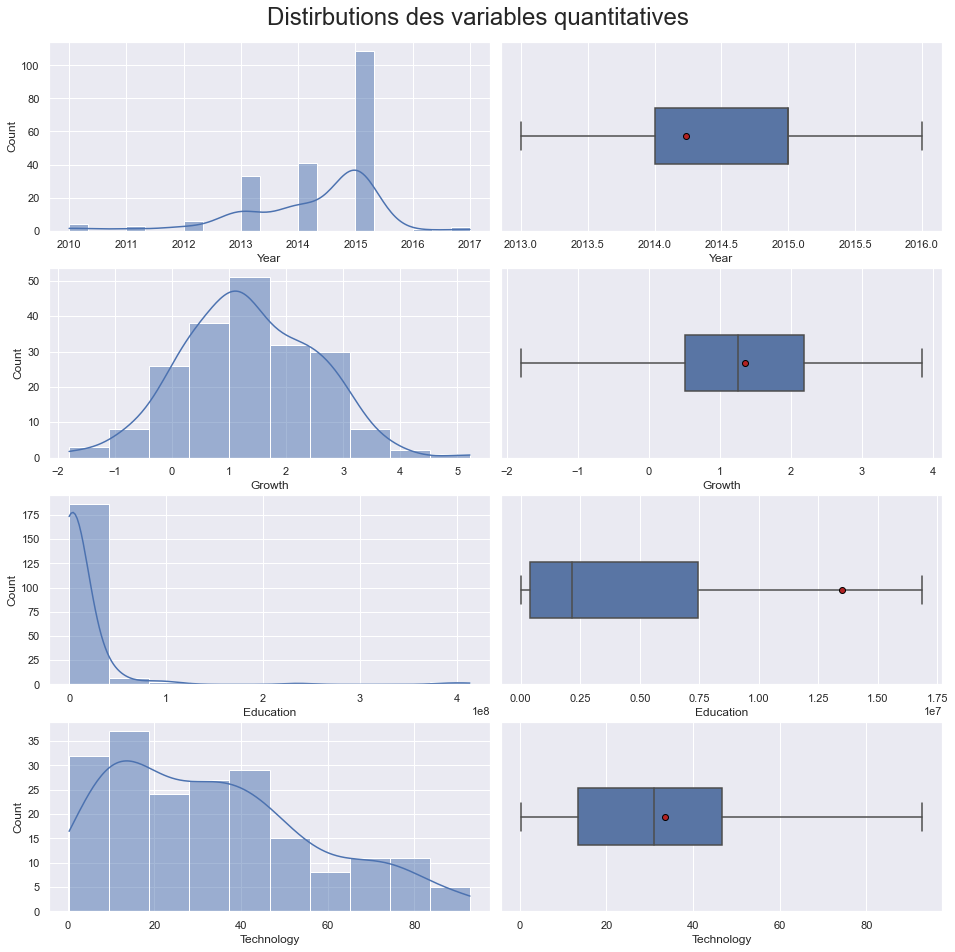

In [27]:
# Nombre de variables quantitatives
nb_quantitaves = len(quantitatives)

# Préparation de l'affichage des graphiques sur deux colonnes: une pour les histogrammes et une pour les boxplots
fig, axes = plt.subplots(nb_quantitaves, 2, figsize=(2*8, nb_quantitaves*4), sharex=False, sharey=False)
fig.subplots_adjust(wspace=0.025, hspace=0.2) # ajuster l'espace entre les graphiques. 
fig.suptitle('Distirbutions des variables quantitatives ', y=0.91, fontsize=24, horizontalalignment='center') # Titre globale de la figure
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'} #Marquage des moyennes en rouge

for i in range(0, nb_quantitaves):
    data = df[quantitatives[i]]

    # Afficher les histogrammes sur la première colonne
    ax = axes[i,0]
    # Ajuster les classes des variables selon leurs types:
    bins = 'auto' if quantitatives[i] not in continues else 10
    sns.histplot(data, ax=ax, kde=True, bins=bins) 

    # Afficher les boxplot sur la deuxième colonne
    ax = axes[i,1]
    sns.boxplot(x=data, ax=ax, orient='h', width=.3, showmeans=True, meanprops=meanprops, showfliers = False) #afficher sans outliers
    # ax.set_title(quantitatives[i])

<em># On s'intérresse dans la suite aux dépendances qui peuvent exister entre les variables</em>

## 3.3 Analyse Bivariée

### 3.3.0 Fonction Utilitaire

In [28]:
def force_mesure(mesure, type):
    """ Renvoie un texte avec la force de la mesure selon les seuils """
    force_text = ''

    #Définition des seuils/intervalles de mesure
    seuils = {0: 'aucune', .2: 'faible', .4: 'moyenne', .6: 'forte', .6: 'très forte'}

    for seuil, force in seuils.items():
        if np.abs(mesure) >= seuil :
            force_text = force

    return force_text + ' ' + type

### 3.3.1 Corrélations Linéaires

#### 3.3.1.0 Fonction Utilitaire

In [29]:
def afficher_correlations(data, variables, categorie=None):
    """ Calcul et affichage des corrélations linéaires entre les 'varibales' """
    # Calcul des corrélations
    correlations = data.corr()
            
    # Afficher les paires de dispersion
    hue_order = data[categorie].sort_values().unique()
    g = sns.PairGrid(data, hue=categorie, hue_order=hue_order)
    g.fig.suptitle('Corrélations linéaires des variables quantitatives ', y=1.025, fontsize=24, horizontalalignment='center') # Titre globale de la figure
    
    # Afficher sur la diagonale les dispersions, par rapport à la catégorie si donnée
    g.map_diag(sns.kdeplot, fill=True)
    
    # Afficher ailleurs les scatter plots avec les régressions linéaires, par rapport à la catégorie si donnée
    g.map_offdiag(sns.regplot, scatter=False, ci=None)
    g.map_offdiag(sns.scatterplot)
    
    # Afficher la légende (catégorie si donnée)
    g.add_legend()

    # Afficher le résultat des corrélations sur les scatter plots
    for i in range(len(variables)):
        for j in range(len(variables)):
            ax = g.axes[i,j]  
            corr = round(correlations.loc[variables[i], variables[j]],2)
            ax.set_title('r²=' + str(corr) + ' (' + force_mesure(corr, 'corrélation') + ')', y=0.99, loc='left')

#### 3.3.1.1 Corrélations selon la région

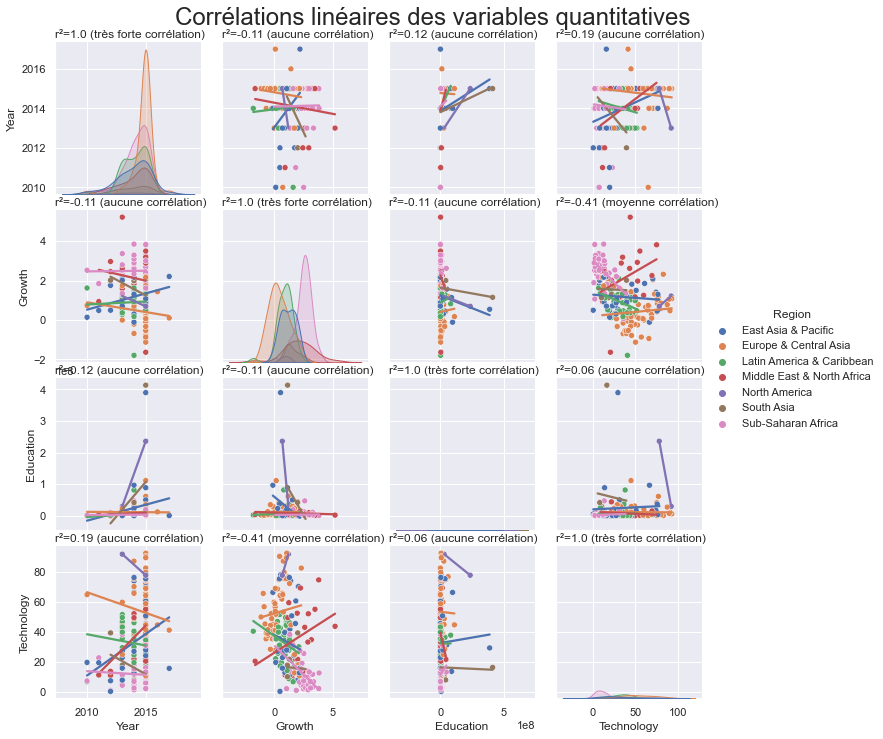

In [30]:
afficher_correlations(df, quantitatives, 'Region')

<em># Il n'y a pas de fortes corrélations qui se dégagent. Par contre, on peut constater visuellement (grâce aux régressions colorées) certaines fortes corrélations au sein d'une même région. On s'intéressera à l'impacte des variables qualitatives plus tard</em>

#### 3.3.1.2 Corrélations selon la catégorie économique

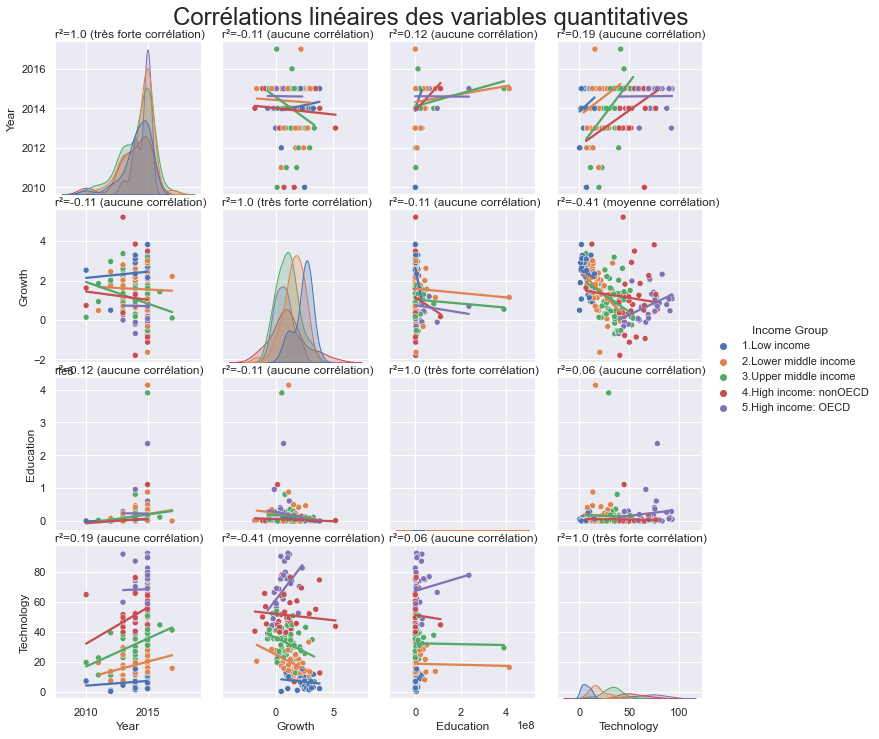

In [31]:
afficher_correlations(df, quantitatives, 'Income Group')

<em># Comme précédement, on observe certaines corrélations par catégorie économique</em>

### 3.3.2 ANOVA : Analyse des variances

#### 3.3.2.0 Fonctions utilitaires

In [32]:
def eta_squared(x,y):
    """ Calcul état carré entre X et Y """
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [33]:
def ANOVA(data, X, Ys):    
    """ Analyse de la variance des variables en paramètres """
    data = data.sort_values(X, ascending=False) #Ordonner le data set sur la catégorie permettra éventuellement de voir les possibles corrélations sur les graphiques

    #Préparation de l'affichage des graphiques (boxplots, dispersions) des variables quantitaives Ys par rapport à la variable qualitative X
    lines = len(Ys)
    cols = 2
    index = 0
    fig, axes = plt.subplots(lines, cols, figsize=(cols*12, lines*5), sharex=False, sharey=False)
    fig.subplots_adjust(wspace=0.025, hspace=0.2) # ajuster l'espace entre les graphiques.     
    meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'} #Marquage des moyennes en rouge

    n2s = 0 #Somme des vriances (état carré)

    # Affichages des graphiques pour chaque Y
    for Y in Ys:        
        #Calcul de la corrélation entre la variable qualitative X et la variable quantitaive Y
        n2 = round(eta_squared(data[X],data[Y]),2)
        n2s += n2

        index = Ys.index(Y)*cols+1 #Index des sous figures

        # Afficher les dispersions        
        ax = plt.subplot(lines,cols,index)
        ax = sns.kdeplot(data=data, x=Y, hue=X)        
        ax.set_title('n²=' + str(n2) + ' (' + force_mesure(n2, 'variance') + ')', x=1.1, loc='right') #Afficher et ajuster la position du titre des graphiques (valeur et type de la corrélation)

        index += 1
        # Afficher les boxplots        
        ax = plt.subplot(lines,cols,index)
        ax = sns.boxplot(data=data, y=X, x=Y, showmeans=True, meanprops=meanprops, showfliers = False) #Afficher les moyenne et Cacher les outliers        
        ax.get_yaxis().set_label_position('right')
        ax.get_yaxis().tick_right()
    
    mu_n2s = round(n2s/lines,2) #moyenne des variances (vriance moyenne)
    fig.suptitle('Variance par ' + X + ' (n²=' + str(mu_n2s) +' ' + force_mesure(mu_n2s, 'variance moyenne') + ')', y=0.92, fontsize=24, horizontalalignment='center') # Titre globale de la figure

#### 3.3.2.1 Variance par rapport à la région

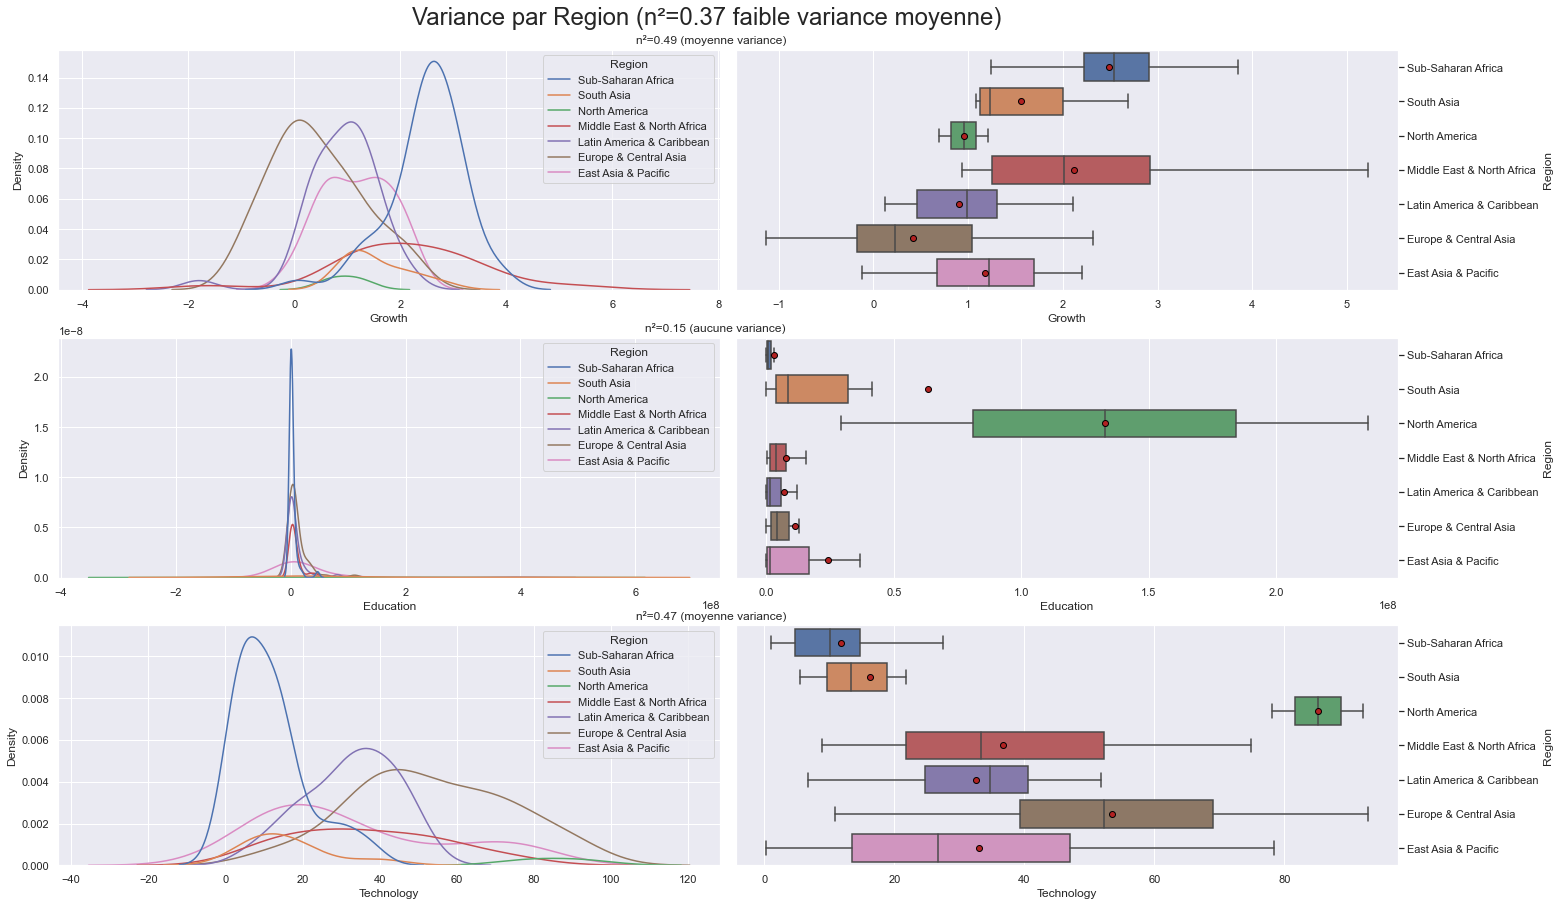

In [34]:
X = 'Region' #qualitative
ANOVA(df, X, quantitatives[1:])

<em># La région géogarphique d'un pays a un impacte sur la croissance et le niveau téchnologique de la population</em>

#### 3.3.2.1 Variance par rapport à la catégorie économique

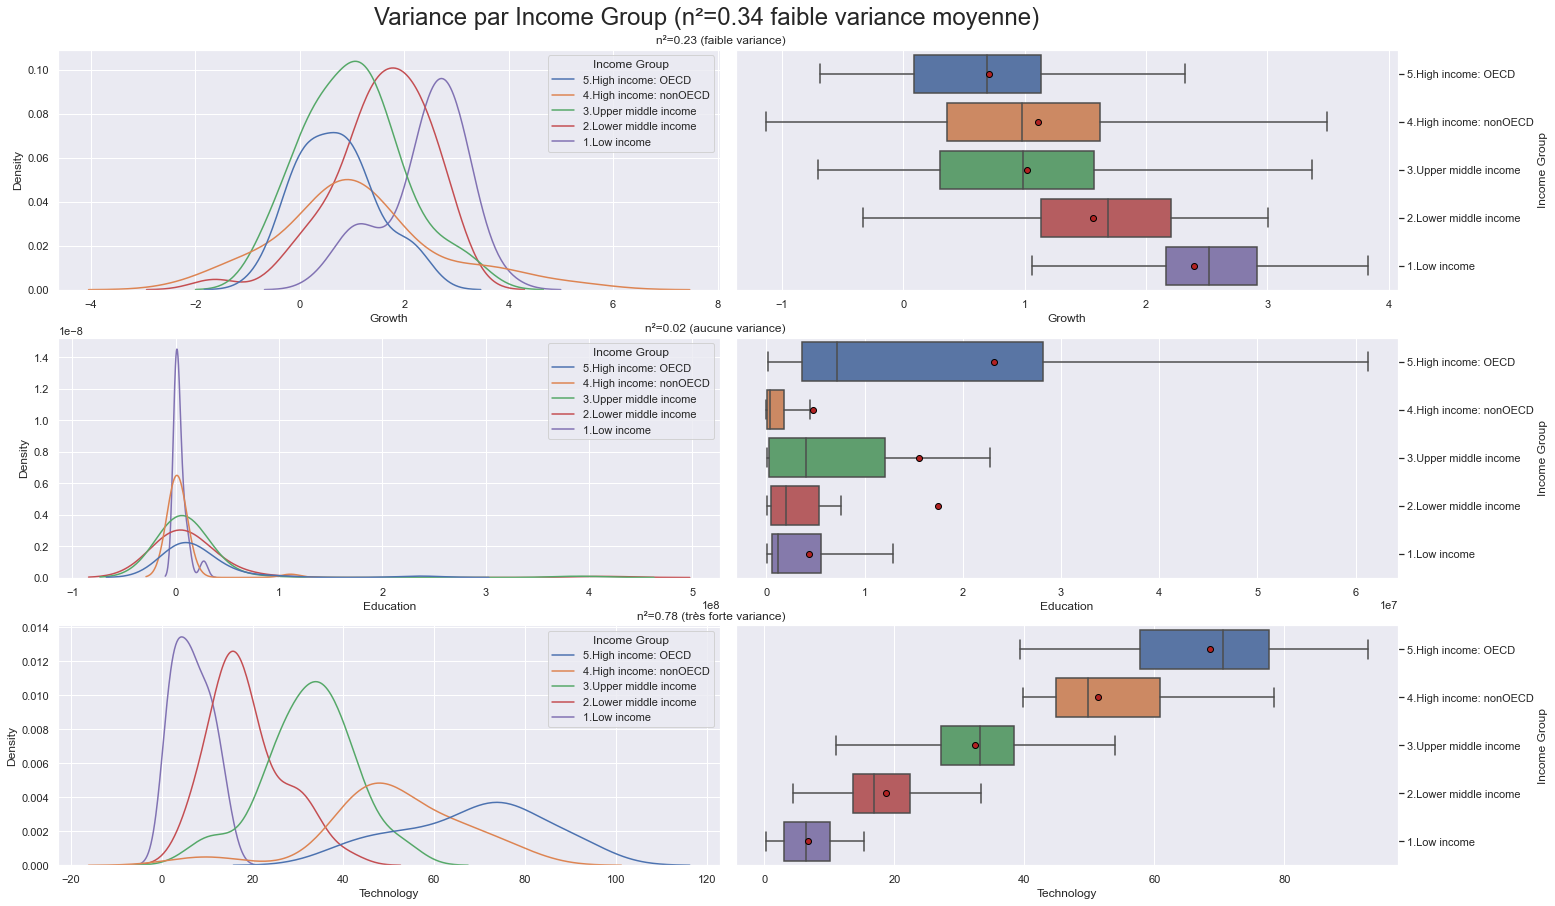

In [35]:
X = qualitatives[1] # 'Income Group' qualitative
ANOVA(df, X, quantitatives[1:])

<em># La catégorie économique a un faible impacte sur la croissance démographique, mais un très fort impacte sur le niveau téchnologique. Cela est intuitf car plus un pays est riche plus sa population a les moyens de s'équiper. Attention cela peut être un biais de confirmation ! (on voit ce qu'on veut voir) </em>

### 3.3.3 CHi-2

In [36]:
import scipy.stats as st

def chi2 (data, X,Y):
    c = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
    cont = c.copy()

    tx = data[X].value_counts()
    ty = data[Y].value_counts()

    n = len(data)
    cont.loc[:,"Total"] = tx
    cont.loc["total",:] = ty
    cont.loc["total","Total"] = n
    tx = pd.DataFrame(tx)
    ty = pd.DataFrame(ty)
    tx.columns = ["foo"]
    ty.columns = ["foo"]
    
    indep = tx.dot(ty.T) / n

    c = c.fillna(0) # on remplace les valeurs nulles par des 0
    mesure = (c-indep)**2/indep
    xi_n = mesure.sum().sum()
    sns.heatmap(mesure/xi_n,annot=c, cmap=sns.cm.rocket_r)

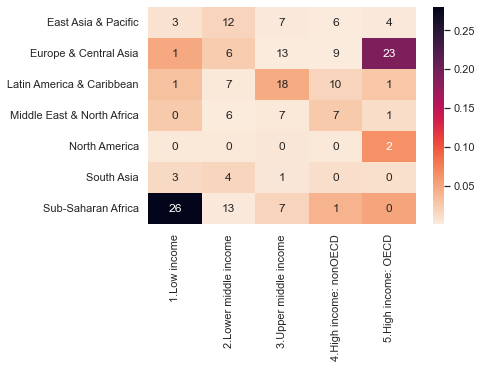

In [37]:
X = "Region" # qualitative
Y = "Income Group" # qualitative
chi2(df, X, Y)

<em># Comme pour l'analyse précédente, on constate un lien évidant entre la répartition géographique des pays et leurs niveaux de richesse: les pays les plus pauvre sont les pays sub-sahariens et les pays les plus riche sont les pays de l'OCDE (Europe en majorité et quelques pays d'Asie et d'Amérique du Nord)</em>

# 4 Analyse Métier : Rechercher les pays les plus attractifs

<em># L'étape finale de ce projet est le classement des pays par leur attractivité selon un score défini depuis les variables du data set</em>

## 4.1 Transformer les indicateurs en indices : normalisation min-max des variables quantitatives

<em># La normalisation min-max permet de ramener toutes les variables quantitatives à la même échelle entre 0 et 1, pour homogénéiser les calculs</em>

In [38]:
indices = []

for indicator in quantitatives:
    indice = indicator+'_INDC'
    indices.append(indice)
    
    max_value = df[indicator].max()
    min_value = df[indicator].min()
    df[indice] = (df[indicator] - min_value) / (max_value - min_value)

df

Code          Name                      Region            Income Group  \
0    ABW         Aruba   Latin America & Caribbean  4.High income: nonOECD   
1    AFG   Afghanistan                  South Asia            1.Low income   
2    AGO        Angola          Sub-Saharan Africa   3.Upper middle income   
3    ALB       Albania       Europe & Central Asia   3.Upper middle income   
4    AND       Andorra       Europe & Central Asia  4.High income: nonOECD   
..   ...           ...                         ...                     ...   
194  WSM         Samoa         East Asia & Pacific   2.Lower middle income   
195  YEM         Yemen  Middle East & North Africa   2.Lower middle income   
196  ZAF  South Africa          Sub-Saharan Africa   3.Upper middle income   
197  ZMB        Zambia          Sub-Saharan Africa   2.Lower middle income   
198  ZWE      Zimbabwe          Sub-Saharan Africa            1.Low income   

       Year    Growth     Education  Technology  Year_INDC  Growth_INDC  \
0    2013.0  0.459929  3.745982e+04   51.730069   0.428571     0.321794   
1    2013.0  2.689163  7.871915e+06    5.492937   0.428571     0.639563   
2    2013.0  3.367572  5.694019e+06    6.823009   0.428571     0.736268   
3    2015.0 -0.159880  1.361851e+06   35.478492   0.714286     0.233442   
4    2015.0 -0.944017  5.572126e+04   65.857230   0.714286     0.121666   
..      ...       ...           ...         ...        ...          ...   
194  2013.0  0.702526  5.292150e+04   15.865618   0.428571     0.356375   
195  2012.0  2.451502  7.625418e+06   13.741565   0.285714     0.605685   
196  2015.0  1.617203  1.889966e+07   31.111098   0.714286     0.486759   
197  2015.0  3.002816  2.264690e+06   13.324343   0.714286     0.684273   
198  2014.0  2.336070  6.144059e+06   15.275565   0.571429     0.589231   

     Education_INDC  Technology_INDC  
0          0.000061         0.555989  
1          0.019021         0.055970  
2          0.013750         0.070354  
3          0.003266         0.380241  
4          0.000105         0.708763  
..              ...              ...  
194        0.000098         0.168143  
195        0.018424         0.145173  
196        0.045708         0.333011  
197        0.005451         0.140661  
198        0.014839         0.161762  

[199 rows x 12 columns]

## 4.2 Création score d'attractivité par combinaison des indices de base

<em># On construit le score selon deux méthodes/mesures : la moyenne pondérée et la f-mesure pondérée. Examine les résultats et la différence entre les deux dans ce qui suit </em>

In [39]:
# Poids des indioces pour le calcul du score d'attractivité
poids = {'Year_INDC': 3, 'Growth_INDC': 4, 'Education_INDC': 1, 'Technology_INDC':2} # Quand tous les poids valent 1 c'est la moyenne arithmétique basique
somme_poids = sum(poids.values())

<em># les poids permettent d'exprimer la force (l'ordre d'importance) des indices dans le calul du score final. Dans notre on donne plus d'importance à la croissance des pays et de la "primeur" des donnés (données plus récentes)</em>

### 4.2.1 Moyenne Pondérée

In [40]:
# Calcul de la moyenne pondérée (Weighted Mean)
df['Score_WM'] = sum([df[indice]*poids[indice] for indice in indices])/somme_poids

# Transformer en Score Relative entre 0 et 100
min = df['Score_WM'].min()
max = df['Score_WM'].max()
df['Score_WM'] = 100* ((df['Score_WM']-min)/(max-min))

### 4.2.2 F-Mesure Pondérée

In [41]:
# Calcul de de la F-Mesure
df['Score_FM'] = df[indices].prod(axis=1)*somme_poids/sum([df[indice]*poids[indice] for indice in indices])

# Transformer en Score Relative
min = df['Score_FM'].min()
max = df['Score_FM'].max()
df['Score_FM'] = 100* ((df['Score_FM']-min)/(max-min))

## 4.3 Afficher les pays les plus attractifs

### 4.3.0 Fonctions utilitaires

In [42]:
def score_norm(data, mesure):
    """ Normalisation min-max de la mesure de score"""
    new_df = data.copy()
    min = new_df[mesure].min()
    max = new_df[mesure].max()
    new_df[mesure+'N'] = 100* ((new_df[mesure]-min)/(max-min))
    return new_df

In [43]:
def score_group(data, mesure, categorie):
    return score_norm(data.groupby(categorie).mean(),mesure).sort_values(mesure+'N', ascending=False)

In [44]:
def afficher_carte(data_frame, mesure, categorie=None):
    """ Renvoie la carte de chaleur des pays selon leur mesure """
    # Création de la carte vierge    
    m = folium.Map( tiles='cartodbpositron', location=[28, 0], zoom_start=2)

    folium.TileLayer('openstreetmap').add_to(m)
    folium.TileLayer('Stamen Terrain').add_to(m)
    folium.TileLayer('Stamen Toner').add_to(m)
    folium.TileLayer('Stamen Water Color').add_to(m)
    folium.TileLayer('cartodbdark_matter').add_to(m)
    
    # Etablir la palette des couleurs (dégradé)
    linear = None
    if not categorie:
        data = score_norm(data_frame, mesure)
        mesure = mesure + 'N'
        linear = cm.LinearColormap(["white", "green","yellow", "red"], vmin=data[mesure].min(), vmax=data[mesure].max())
        linear.caption = mesure # Nommer la palette
        linear.add_to(m) # Afficher la palette
    else :
        data = data_frame
        categorie_data = data.groupby(categorie).mean()
        categorie_data = categorie_data.reset_index(level=categorie)[[categorie,mesure]]
        categorie_data = score_norm(categorie_data, mesure)
        mesure = mesure + 'N'
        data = categorie_data.merge(data[['Code',categorie]])
        categories = data.sort_values(mesure)[categorie].unique()
        colors = ["blue", "cyan", "green", "yellow", "orange", "brown", "red", "purple", "black"]
        linear = lambda x : colors[list(categories).index(x.values.item(0))] if x.values.size > 0 else 'grey'
        # Créer et afficher la légende
        template = """{% macro html(this, kwargs) %} <!doctype html> <html lang="en"> <head>   <meta charset="utf-8">   <meta name="viewport" content="width=device-width, initial-scale=1">   <title>jQuery UI Draggable - Default functionality</title>   <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">    <script src="https://code.jquery.com/jquery-1.12.4.js"></script>   <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>      <script>   $( function() {     $( "#maplegend" ).draggable({                     start: function (event, ui) {                         $(this).css({                             right: "auto",                             top: "auto",                             bottom: "auto"                         });                     }                 }); });    </script> </head> <body>    <div id='maplegend' class='maplegend'      style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);      border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>       <div class='legend-title'>"""
        template += categorie
        template += """</div> <div class='legend-scale'>   <ul class='legend-labels'> """
        template += ' '.join(["<li><span style='background:" + colors[i] + ";opacity:0.7;'></span>" + categories[i] + " ("+ str(round(categorie_data[categorie_data[categorie]==categories[i]][mesure].values.min(),2)) + ") </li>" for i in range(len(categories))])
        template += """ </ul> </div> </div>   </body> </html>  <style type='text/css'>   .maplegend .legend-title {     text-align: left;     margin-bottom: 5px;     font-weight: bold;     font-size: 90%;     }   .maplegend .legend-scale ul {     margin: 0;     margin-bottom: 5px;     padding: 0;     float: left;     list-style: none;     }   .maplegend .legend-scale ul li {     font-size: 80%;     list-style: none;     margin-left: 0;     line-height: 18px;     margin-bottom: 2px;     }   .maplegend ul.legend-labels li span {     display: block;     float: left;     height: 16px;     width: 30px;     margin-right: 5px;     margin-left: 0;     border: 1px solid #999;     }   .maplegend .legend-source {     font-size: 80%;     color: #777;     clear: both;     }   .maplegend a {     color: #777;     } </style> {% endmacro %}"""

        macro = MacroElement()
        macro._template = Template(template)
        m.get_root().add_child(macro)        

    # Fonction de colorisation des données (pays)
    map_colors = None
    if not categorie:
        map_colors = lambda x: {
            'fillColor': (linear(data[data["Code"]==x['properties']['adm0_a3_us']][mesure].min()) if data[data["Code"]==x['properties']['adm0_a3_us']][mesure].min()>=0 else 'grey'),
            'color': 'black',
            'weight': 0.1,
            'fillOpacity': 0.4,
        }        
    else:
        strength = lambda x: x/data[mesure].max() if x >= 0 else 0.2
        map_colors = lambda x: {
            'fillColor': linear(data[data["Code"]==x['properties']['adm0_a3_us']][categorie]),
            'color': 'black',
            'weight': 0.1,
            'fillOpacity': strength(data[data["Code"]==x['properties']['adm0_a3_us']][mesure].min()),
        }

    # Récupérer les données géographiques de tous les pays et les colorer selon leur mesure
    folium.GeoJson(
        "https://data.opendatasoft.com/explore/dataset/natural-earth-countries-1_110m@public/download/?format=geojson&timezone=Europe/Berlin&lang=fr",
        style_function = map_colors,
        name = mesure,
    ).add_to(m)

    folium.LayerControl().add_to(m)
    
    return m

### 4.3.1 Au niveau mondial

<em># Classement des pays par le score d'attractivité au niveau global (sans groupement) selon les deux mesures choisies</em>

#### 4.3.1.1 Selon la Moyenne Pondérée (WM)

In [45]:
# Affichage des pays les plus pertinents dans un ordre décroissant
df.sort_values('Score_WM', ascending=False).head(10)

Code           Name                      Region            Income Group  \
18   BHR        Bahrain  Middle East & North Africa  4.High income: nonOECD   
150  QAT          Qatar  Middle East & North Africa  4.High income: nonOECD   
107  LUX     Luxembourg       Europe & Central Asia     5.High income: OECD   
137  OMN           Oman  Middle East & North Africa  4.High income: nonOECD   
154  SAU   Saudi Arabia  Middle East & North Africa  4.High income: nonOECD   
136  NZL    New Zealand         East Asia & Pacific     5.High income: OECD   
188  USA  United States               North America     5.High income: OECD   
31   CHE    Switzerland       Europe & Central Asia     5.High income: OECD   
88   JOR         Jordan  Middle East & North Africa   3.Upper middle income   
168  SWE         Sweden       Europe & Central Asia     5.High income: OECD   

       Year    Growth     Education  Technology  Year_INDC  Growth_INDC  \
18   2015.0  3.812797  7.062457e+05   74.913086   0.714286     0.799733   
150  2015.0  3.495070  9.663334e+05   55.258399   0.714286     0.754442   
107  2015.0  2.319778  3.167350e+05   82.851841   0.714286     0.586909   
137  2013.0  5.217721  1.808355e+06   43.863069   0.428571     1.000000   
154  2015.0  2.251422  1.491623e+07   69.492774   0.714286     0.577165   
136  2015.0  2.088703  3.393716e+06   70.519316   0.714286     0.553970   
188  2015.0  0.692801  2.358419e+08   78.046112   0.714286     0.354989   
31   2015.0  1.077221  5.805848e+06   92.788113   0.714286     0.409787   
88   2015.0  3.185855  4.402875e+06   34.886377   0.714286     0.710365   
168  2015.0  1.055074  7.160800e+06   89.759378   0.714286     0.406630   

     Education_INDC  Technology_INDC    Score_WM    Score_FM  
18         0.001679         0.806695  100.000000    0.531770  
150        0.002309         0.594145   88.857574    0.556385  
107        0.000737         0.892547   87.479506    0.209979  
137        0.004347         0.470913   86.662003    0.672878  
154        0.036068         0.748079   82.096639    8.886106  
136        0.008183         0.759180   80.285127    1.996651  
188        0.570714         0.840577   78.986246  100.000000  
31         0.014021         1.000000   78.643016    3.384622  
88         0.010625         0.373837   77.660423    1.677701  
168        0.017300         0.967247   77.265824    4.060727

In [46]:
afficher_carte(df, 'Score_WM')

#### 4.3.1.2 Selon la F-Mesure (FM)

In [47]:
# Affichage des pays les plus pertinents dans un ordre décroissant
df.sort_values('Score_FM', ascending=False).head(10)

Code           Name                     Region            Income Group  \
188  USA  United States              North America     5.High income: OECD   
33   CHN          China        East Asia & Pacific   3.Upper middle income   
80   IND          India                 South Asia   2.Lower middle income   
46   DEU        Germany      Europe & Central Asia     5.High income: OECD   
152  RUS         Russia      Europe & Central Asia  4.High income: nonOECD   
89   JPN          Japan        East Asia & Pacific     5.High income: OECD   
24   BRA         Brazil  Latin America & Caribbean   3.Upper middle income   
60   FRA         France      Europe & Central Asia     5.High income: OECD   
96   KOR          Korea        East Asia & Pacific     5.High income: OECD   
141  PHL    Philippines        East Asia & Pacific   2.Lower middle income   

       Year    Growth     Education  Technology  Year_INDC  Growth_INDC  \
188  2015.0  0.692801  2.358419e+08   78.046112   0.714286     0.354989   
33   2015.0  0.541479  3.896280e+08   29.394186   0.714286     0.333418   
80   2015.0  1.148215  4.132309e+08   16.369654   0.714286     0.419907   
46   2015.0  1.193867  6.121650e+07   77.066090   0.714286     0.426414   
152  2015.0  0.170245  1.111424e+08   44.814847   0.714286     0.280500   
89   2014.0 -0.115284  9.640221e+07   66.553873   0.571429     0.239799   
24   2014.0  0.817556  8.134435e+07   37.899720   0.571429     0.372772   
60   2015.0  0.407491  4.143127e+07   75.149887   0.714286     0.314319   
96   2015.0  0.451318  3.685684e+07   75.667733   0.714286     0.320566   
141  2015.0  1.564497  4.999448e+07   31.355498   0.714286     0.479246   

     Education_INDC  Technology_INDC   Score_WM    Score_FM  
188        0.570714         0.840577  78.986246  100.000000  
33         0.942880         0.314444  64.886403   66.858904  
80         1.000000         0.173593  67.119387   48.143567  
46         0.148116         0.829978  76.077641   31.641767  
152        0.268938         0.481206  54.729090   27.566739  
89         0.233266         0.716297  51.843080   25.221684  
24         0.196826         0.406424  49.556335   19.324487  
60         0.100235         0.809256  66.184969   17.006567  
96         0.089165         0.814856  66.647116   15.459910  
141        0.120958         0.335654  61.276886   13.692113

In [48]:
afficher_carte(df, 'Score_FM')

### 4.3.2 Par région

#### 4.3.2.1 Selon la Moyenne Pondérée (WM)

In [49]:
score_group(df, 'Score_WM', 'Region')

Year    Growth     Education  Technology  \
Region                                                                        
North America               2014.000000  0.953346  1.326324e+08   85.094733   
Middle East & North Africa  2014.047619  2.122460  7.693749e+06   36.780008   
Europe & Central Asia       2014.769231  0.422211  1.103693e+07   53.488831   
Sub-Saharan Africa          2014.127660  2.492068  3.143562e+06   11.842215   
East Asia & Pacific         2013.968750  1.175658  2.431197e+07   33.003570   
South Asia                  2014.000000  1.562222  6.320568e+07   16.182914   
Latin America & Caribbean   2014.027027  0.905070  6.941863e+06   32.496175   

                            Year_INDC  Growth_INDC  Education_INDC  \
Region                                                               
North America                0.571429     0.392129        0.320944   
Middle East & North Africa   0.578231     0.558782        0.018589   
Europe & Central Asia        0.681319     0.316417        0.026680   
Sub-Saharan Africa           0.589666     0.611468        0.007578   
East Asia & Pacific          0.566964     0.423819        0.058806   
South Asia                   0.571429     0.478922        0.152930   
Latin America & Caribbean    0.575290     0.385247        0.016770   

                            Technology_INDC   Score_WM   Score_FM   Score_WMN  
Region                                                                         
North America                      0.916802  72.044125  56.141846  100.000000  
Middle East & North Africa         0.394316  59.895829   2.019474   54.703442  
Europe & Central Asia              0.575009  54.547205   3.363013   34.760376  
Sub-Saharan Africa                 0.124633  54.278393   0.417726   33.758074  
East Asia & Pacific                0.353476  48.578965   5.100122   12.506991  
South Asia                         0.171574  47.918938   6.936496   10.045989  
Latin America & Caribbean          0.347989  45.224657   1.604157    0.000000

In [50]:
afficher_carte(df, 'Score_WM', 'Region')

#### 4.3.2.2 Selon la F-Mesure (FM)

In [51]:
score_group(df, 'Score_FM', 'Region')

Year    Growth     Education  Technology  \
Region                                                                        
North America               2014.000000  0.953346  1.326324e+08   85.094733   
South Asia                  2014.000000  1.562222  6.320568e+07   16.182914   
East Asia & Pacific         2013.968750  1.175658  2.431197e+07   33.003570   
Europe & Central Asia       2014.769231  0.422211  1.103693e+07   53.488831   
Middle East & North Africa  2014.047619  2.122460  7.693749e+06   36.780008   
Latin America & Caribbean   2014.027027  0.905070  6.941863e+06   32.496175   
Sub-Saharan Africa          2014.127660  2.492068  3.143562e+06   11.842215   

                            Year_INDC  Growth_INDC  Education_INDC  \
Region                                                               
North America                0.571429     0.392129        0.320944   
South Asia                   0.571429     0.478922        0.152930   
East Asia & Pacific          0.566964     0.423819        0.058806   
Europe & Central Asia        0.681319     0.316417        0.026680   
Middle East & North Africa   0.578231     0.558782        0.018589   
Latin America & Caribbean    0.575290     0.385247        0.016770   
Sub-Saharan Africa           0.589666     0.611468        0.007578   

                            Technology_INDC   Score_WM   Score_FM   Score_FMN  
Region                                                                         
North America                      0.916802  72.044125  56.141846  100.000000  
South Asia                         0.171574  47.918938   6.936496   11.698291  
East Asia & Pacific                0.353476  48.578965   5.100122    8.402816  
Europe & Central Asia              0.575009  54.547205   3.363013    5.285479  
Middle East & North Africa         0.394316  59.895829   2.019474    2.874425  
Latin America & Caribbean          0.347989  45.224657   1.604157    2.129115  
Sub-Saharan Africa                 0.124633  54.278393   0.417726    0.000000

In [52]:
afficher_carte(df, 'Score_FM', 'Region')

### 4.3.3 Par catégorie économique

#### 4.3.3.1 Selon la Moyenne Pondérée (WM)

In [53]:
score_group(df, 'Score_WM', 'Income Group')

Year    Growth     Education  Technology  \
Income Group                                                              
5.High income: OECD     2014.612903  0.706091  2.322355e+07   68.571579   
4.High income: nonOECD  2013.939394  1.110454  4.797942e+06   51.258260   
1.Low income            2014.147059  2.394602  4.356815e+06    6.776905   
2.Lower middle income   2014.354167  1.566090  1.745748e+07   18.765222   
3.Upper middle income   2014.150943  1.019705  1.555898e+07   32.455134   

                        Year_INDC  Growth_INDC  Education_INDC  \
Income Group                                                     
5.High income: OECD      0.658986     0.356883        0.056172   
4.High income: nonOECD   0.562771     0.414524        0.011581   
1.Low income             0.592437     0.597575        0.010514   
2.Lower middle income    0.622024     0.479473        0.042218   
3.Upper middle income    0.592992     0.401588        0.037623   

                        Technology_INDC   Score_WM  Score_FM   Score_WMN  
Income Group                                                              
5.High income: OECD            0.738117  62.836852  8.958214  100.000000  
4.High income: nonOECD         0.550887  54.058541  1.423171   41.731418  
1.Low income                   0.069855  51.447353  0.359058   24.398903  
2.Lower middle income          0.199500  49.742741  2.412765   13.084047  
3.Upper middle income          0.347545  47.771596  3.293625    0.000000

In [54]:
afficher_carte(df, 'Score_WM', 'Income Group')

#### 4.3.3.2 Selon la F-Mesure (FM)

In [55]:
score_group(df, 'Score_FM', 'Income Group')

Year    Growth     Education  Technology  \
Income Group                                                              
5.High income: OECD     2014.612903  0.706091  2.322355e+07   68.571579   
3.Upper middle income   2014.150943  1.019705  1.555898e+07   32.455134   
2.Lower middle income   2014.354167  1.566090  1.745748e+07   18.765222   
4.High income: nonOECD  2013.939394  1.110454  4.797942e+06   51.258260   
1.Low income            2014.147059  2.394602  4.356815e+06    6.776905   

                        Year_INDC  Growth_INDC  Education_INDC  \
Income Group                                                     
5.High income: OECD      0.658986     0.356883        0.056172   
3.Upper middle income    0.592992     0.401588        0.037623   
2.Lower middle income    0.622024     0.479473        0.042218   
4.High income: nonOECD   0.562771     0.414524        0.011581   
1.Low income             0.592437     0.597575        0.010514   

                        Technology_INDC   Score_WM  Score_FM   Score_FMN  
Income Group                                                              
5.High income: OECD            0.738117  62.836852  8.958214  100.000000  
3.Upper middle income          0.347545  47.771596  3.293625   34.126214  
2.Lower middle income          0.199500  49.742741  2.412765   23.882656  
4.High income: nonOECD         0.550887  54.058541  1.423171   12.374623  
1.Low income                   0.069855  51.447353  0.359058    0.000000

In [56]:
afficher_carte(df, 'Score_FM', 'Income Group')

## 4.4 Conclusion

<p><em>Après observation des différents résultats, on peut conclure que si on devait choisir un seul pays pour l'expansion de l'entreprise, les "Etats-Unis" et "l'Amérique du Nord" sur une plus grande échelle serait le choix le plus évident car se trouvant toujours en bonne en position si ce n'est la meilleure et ce quel que soit la mesure adoptée  ou le critère de groupement.</em><p>
<p><em>Le reste du classement quant à lui est un peu plus mitiger. Tantôt la "Chine", la "Russie" la "Suisse" ou "l'Allemagne" tantôt "l'Inde", les pays du Golf et la "Suède" l'emporte. Comme souvent en statistique, quand on se retrouve face à des valeurs moyenne (au sens de force/intensité) il est difficile de trancher, pour cela il faudrait une étude un peu plus poussée et/ou l'avis d'un expert pour pouvoir les départager.</em><p>
